<a href="https://colab.research.google.com/github/beingUday/NeuroNexus/blob/main/Titanic_survival_project_NeuroNexus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler,LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,precision_score,f1_score,recall_score,roc_auc_score


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/NeuroNexus/tested.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [ ]:
data.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1


In [ ]:
#selecting the rows where the value of Fare is not null.Removing that row wouldn't create much impact to the results as there is only one such row

data=data[data["Fare"].notna()]
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
df=data

In [ ]:
features= ["Sex","SibSp","Embarked","Pclass","Survived"]
for feature in features:
  print(df[feature].value_counts())
  print("\n")

Sex
male      265
female    152
Name: count, dtype: int64


SibSp
0    282
1    110
2     14
3      4
4      4
8      2
5      1
Name: count, dtype: int64


Embarked
S    269
C    102
Q     46
Name: count, dtype: int64


Pclass
3    217
1    107
2     93
Name: count, dtype: int64


Survived
0    265
1    152
Name: count, dtype: int64




# Let's explore which handling technique for missing values would fit this case

In [ ]:
def median_age(df):
  median=df["Age"].median()
  return median

In [ ]:
def mean_age(df):
  mean=df["Age"].mean()
  return mean

In [ ]:
df["Median"]=df.groupby(["Pclass","Sex"])["Age"].fillna(round(median_age(df),2))

In [ ]:
df["Mean"]=df.groupby(["Pclass","Sex"])["Age"].fillna(round(mean_age(df),2))

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Median,Mean
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,34.5,34.50
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,47.0,47.00
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,62.0,62.00
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,27.0,27.00
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,22.0,22.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,27.0,30.18
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,39.0,39.00
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,38.5,38.50
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,27.0,30.18


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 417 entries, 0 to 417
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  417 non-null    int64  
 1   Survived     417 non-null    int64  
 2   Pclass       417 non-null    int64  
 3   Name         417 non-null    object 
 4   Sex          417 non-null    object 
 5   Age          331 non-null    float64
 6   SibSp        417 non-null    int64  
 7   Parch        417 non-null    int64  
 8   Ticket       417 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     417 non-null    object 
 12  Median       417 non-null    float64
 13  Mean         417 non-null    float64
dtypes: float64(4), int64(5), object(5)
memory usage: 48.9+ KB


In [ ]:
print(f"Percentage of null values in Cabin : {df['Cabin'].isna().mean()*100:.1f}%")

Percentage of null values in Cabin : 78.2%


#Since it is too high :
1. Mapping the missingness

2. Droping the entire column



In [ ]:
df["Has_Cabin"]=df["Cabin"].notna().astype(int)
df["Deck"]=df["Cabin"].str[0]
df["Deck"]=df["Deck"].fillna("Unknown")
df=df.drop("Cabin",axis=1)
df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Median,Mean,Has_Cabin,Deck
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,34.5,34.50,0,Unknown
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,47.0,47.00,0,Unknown
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,62.0,62.00,0,Unknown
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,27.0,27.00,0,Unknown
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,22.0,22.00,0,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,S,27.0,30.18,0,Unknown
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,39.0,39.00,1,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S,38.5,38.50,0,Unknown
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,S,27.0,30.18,0,Unknown


In [ ]:
std=df["Age"].std()
std_M=df["Mean"].std()
std_m=df["Median"].std()
std,std_M,std_m

(14.104572594801612, 12.562331091189243, 12.628257501637759)

In [ ]:
plot_df = pd.melt(df,
                 value_vars=['Age', 'Median', 'Mean'],  # Your three features
                 var_name='Metric',  # This will be used for hue
                 value_name='Value')  # All values will be in this column


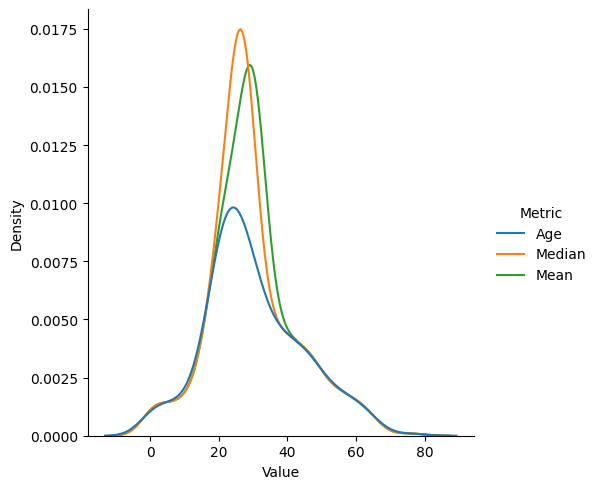

In [ ]:
sns.displot(plot_df,x="Value",hue="Metric",kind="kde")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 417 entries, 0 to 417
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  417 non-null    int64  
 1   Survived     417 non-null    int64  
 2   Pclass       417 non-null    int64  
 3   Name         417 non-null    object 
 4   Sex          417 non-null    object 
 5   Age          331 non-null    float64
 6   SibSp        417 non-null    int64  
 7   Parch        417 non-null    int64  
 8   Ticket       417 non-null    object 
 9   Fare         417 non-null    float64
 10  Embarked     417 non-null    object 
 11  Median       417 non-null    float64
 12  Mean         417 non-null    float64
 13  Has_Cabin    417 non-null    int64  
 14  Deck         417 non-null    object 
dtypes: float64(4), int64(6), object(5)
memory usage: 52.1+ KB


In [ ]:
df1=df.drop(columns=["PassengerId","Name","Age","Ticket"])

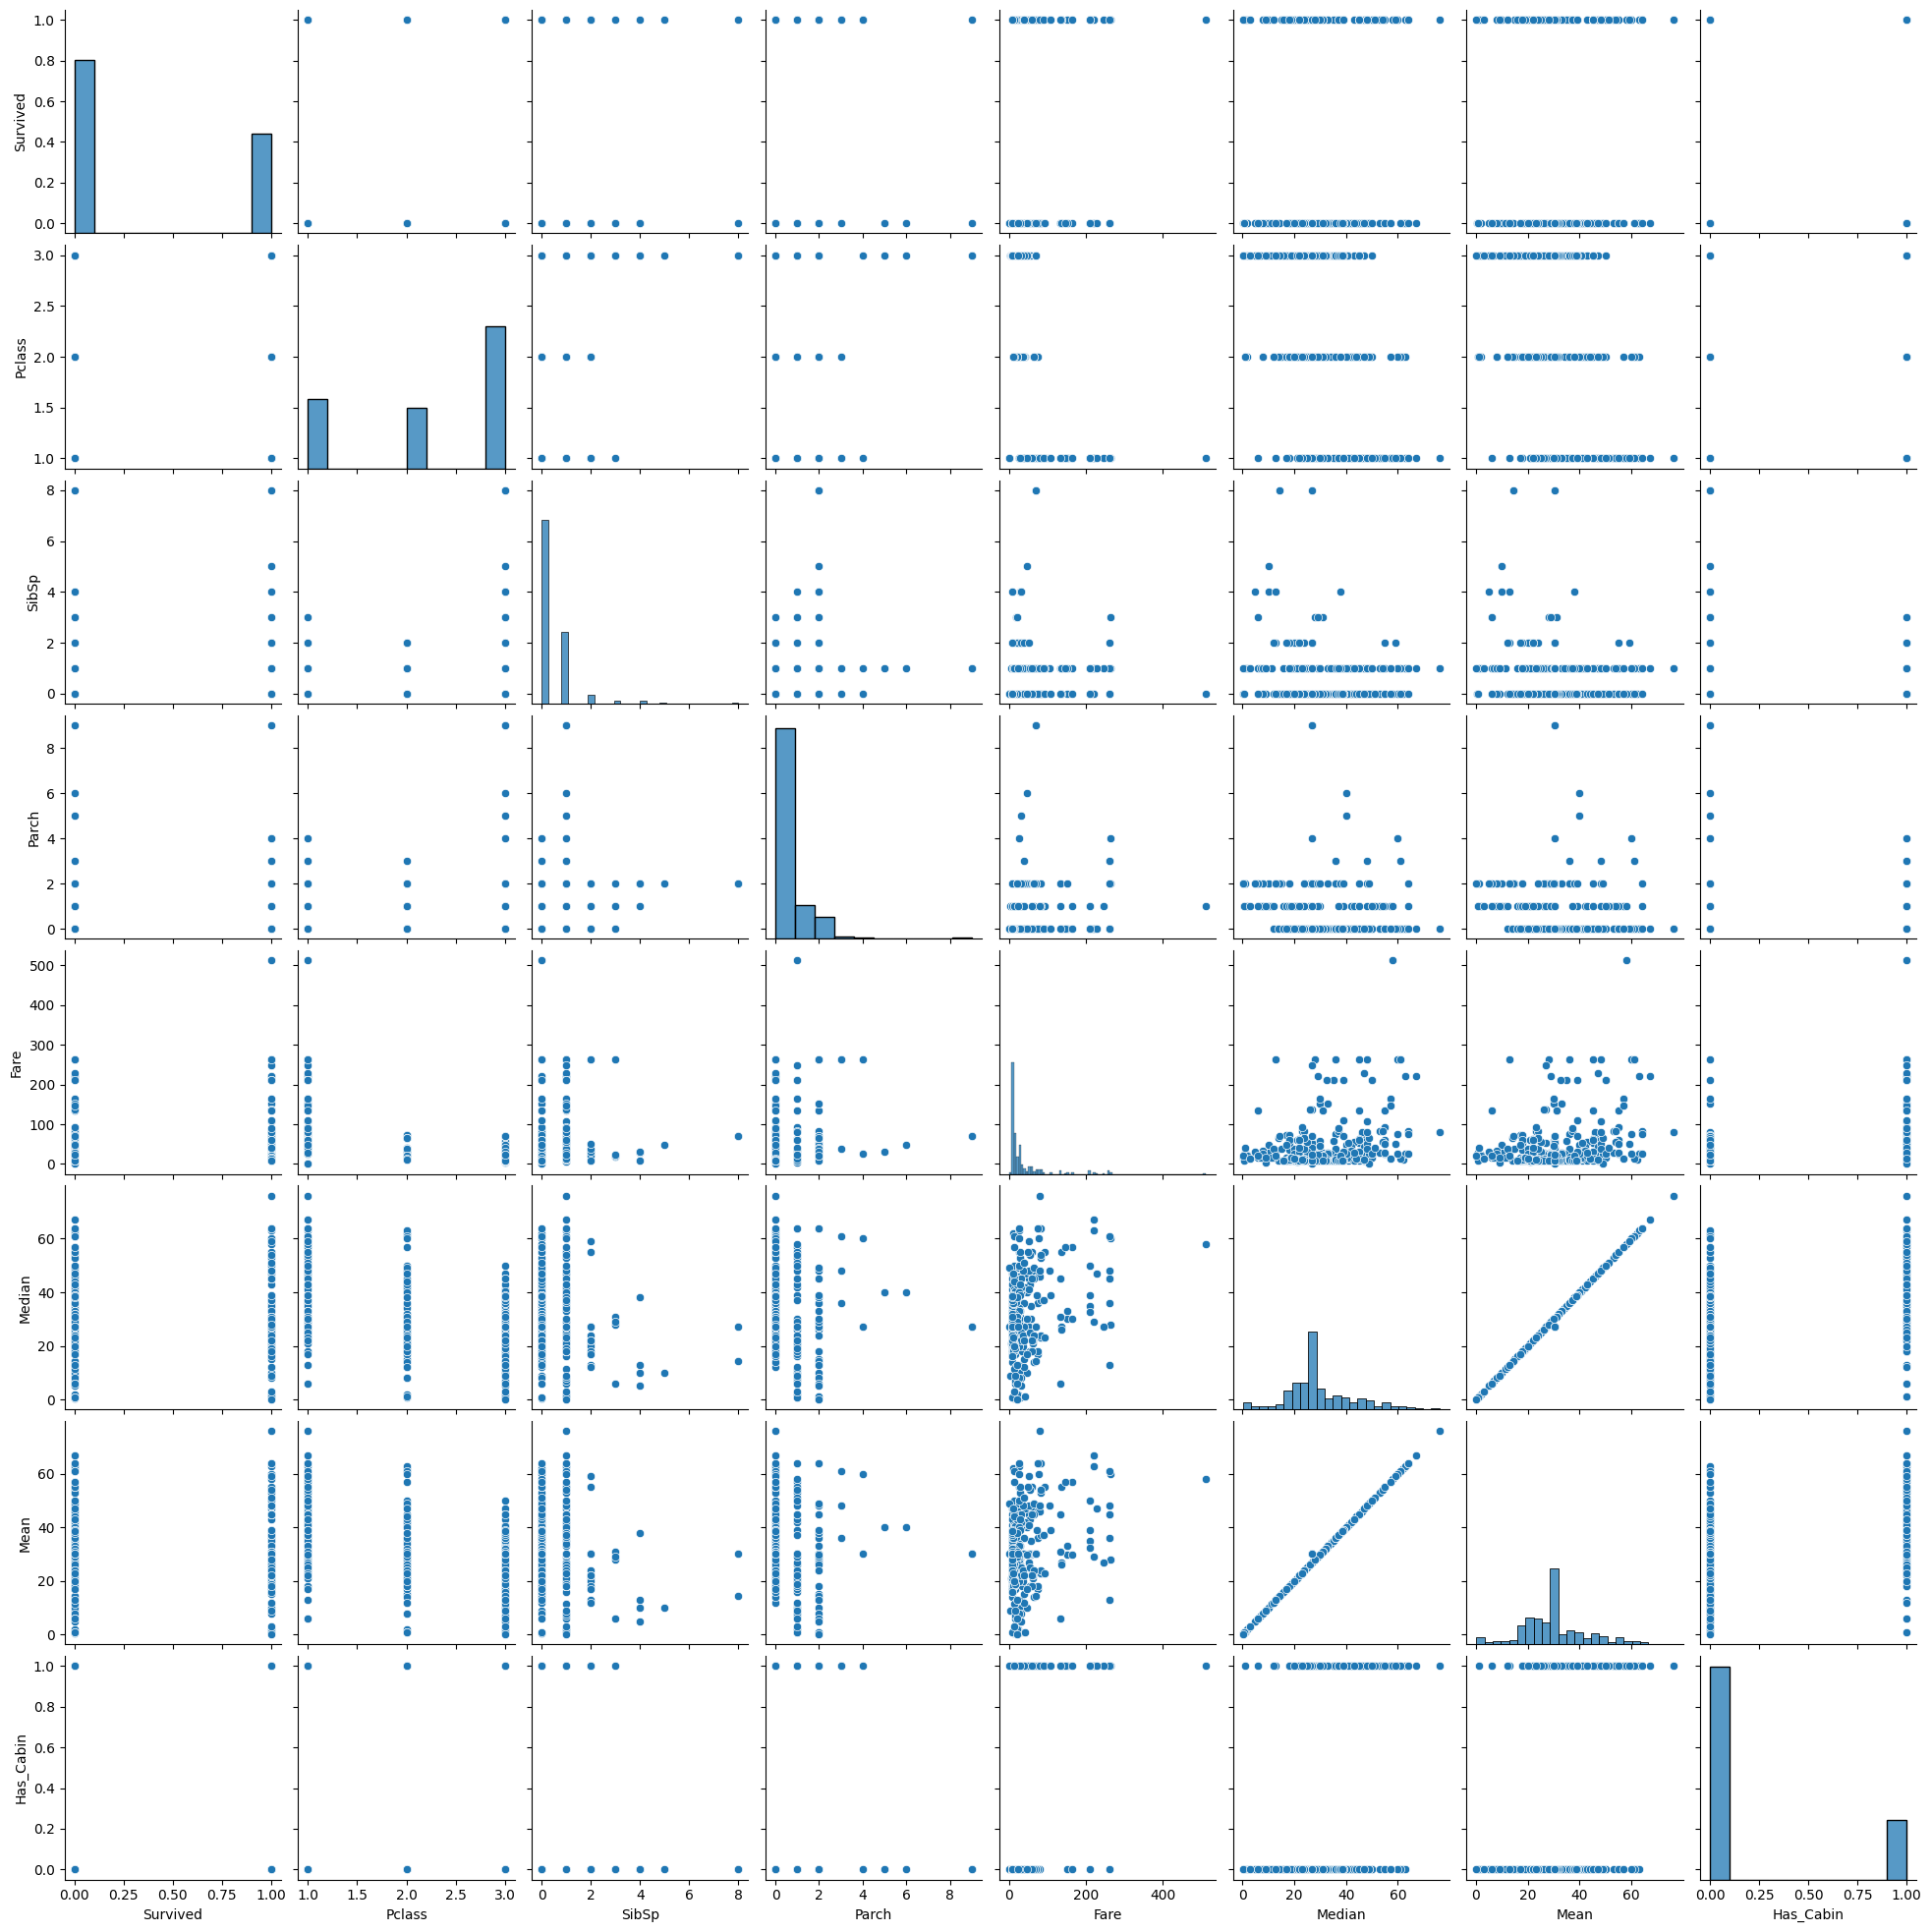

In [ ]:
sns.pairplot(df1)

In [ ]:
df["Sex"]=df["Sex"].map({"male":1,"female":0})

In [ ]:
df=df.drop(columns={"PassengerId","Name","Ticket","Age"})
df

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Median,Mean,Has_Cabin,Deck
0,0,3,1,0,0,7.8292,Q,34.5,34.50,0,Unknown
1,1,3,0,1,0,7.0000,S,47.0,47.00,0,Unknown
2,0,2,1,0,0,9.6875,Q,62.0,62.00,0,Unknown
3,0,3,1,0,0,8.6625,S,27.0,27.00,0,Unknown
4,1,3,0,1,1,12.2875,S,22.0,22.00,0,Unknown
...,...,...,...,...,...,...,...,...,...,...,...
413,0,3,1,0,0,8.0500,S,27.0,30.18,0,Unknown
414,1,1,0,0,0,108.9000,C,39.0,39.00,1,C
415,0,3,1,0,0,7.2500,S,38.5,38.50,0,Unknown
416,0,3,1,0,0,8.0500,S,27.0,30.18,0,Unknown


#Now since , the dataset is imbalanced , using scaling techniques to make it balanced


In [ ]:
cat=["Embarked","Deck"]
encoder=LabelEncoder()
for col in cat:
  df[col]=encoder.fit_transform(df[col])
df
Y=df["Survived"]
X=df.drop(columns={"Survived"})

In [ ]:
smote=SMOTE()
X,Y=smote.fit_resample(X,Y)
X

,Pclass,Sex,SibSp,Parch,Fare,Embarked,Median,Mean,Has_Cabin,Deck
0,3,1,0,0,7.829200,1,34.500000,34.500000,0,7
1,3,0,1,0,7.000000,2,47.000000,47.000000,0,7
2,2,1,0,0,9.687500,1,62.000000,62.000000,0,7
3,3,1,0,0,8.662500,2,27.000000,27.000000,0,7
4,3,0,1,1,12.287500,2,22.000000,22.000000,0,7
...,...,...,...,...,...,...,...,...,...,...
525,2,0,0,0,21.000000,2,28.008692,30.386782,0,7
526,3,0,1,1,12.910218,2,1.913386,1.913386,0,7
527,3,0,1,1,14.078806,1,4.239349,4.239349,0,7
528,2,0,0,1,22.439364,2,28.439364,29.330775,0,7


In [ ]:
scaler=StandardScaler()
re_X=scaler.fit_transform(X)

In [ ]:
X=pd.DataFrame(re_X,columns=X.columns)
X

,Pclass,Sex,SibSp,Parch,Fare,Embarked,Median,Mean,Has_Cabin,Deck
0,0.935479,1.0,-0.504139,-0.417374,-0.522976,-0.419446,0.344672,0.299936,-0.546827,0.564995
1,0.935479,-1.0,0.667763,-0.417374,-0.536334,0.769358,1.281032,1.241665,-0.546827,0.564995
2,-0.214878,1.0,-0.504139,-0.417374,-0.493041,-0.419446,2.404664,2.371740,-0.546827,0.564995
3,0.935479,1.0,-0.504139,-0.417374,-0.509553,0.769358,-0.217144,-0.265101,-0.546827,0.564995
4,0.935479,-1.0,0.667763,0.621162,-0.451157,0.769358,-0.591688,-0.641792,-0.546827,0.564995
...,...,...,...,...,...,...,...,...,...,...
525,-0.214878,-1.0,-0.504139,-0.417374,-0.310805,0.769358,-0.141584,-0.009947,-0.546827,0.564995
526,0.935479,-1.0,0.667763,0.621162,-0.441125,0.769358,-2.096352,-2.155084,-0.546827,0.564995
527,0.935479,-1.0,0.667763,0.621162,-0.422300,-0.419446,-1.922117,-1.979850,-0.546827,0.564995
528,-0.214878,-1.0,-0.504139,0.621162,-0.287618,0.769358,-0.109322,-0.089504,-0.546827,0.564995


In [ ]:
Y

,Survived
0,0
1,1
2,0
3,0
4,1
...,...
525,1
526,1
527,1
528,1


In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25)

In [ ]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((397, 10), (133, 10), (397,), (133,))

In [ ]:
param_grid_lr = {
    'C': [0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga']
}
param_grid_svm = {

    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}
param_grid_rf = {

    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],       # Number of neighbors
    'weights': ['uniform', 'distance'],     # Weight function
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Distance metric
}
param_grid_gb = {

    'n_estimators': [100, 200, 300],       # Number of boosting stages
    'learning_rate': [0.01, 0.1, 0.2],     # Learning rate
    'max_depth': [3, 5, 7],                # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],       # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4]          # Minimum samples required at a leaf node
}
param_grid_mnb = {
    'alpha':[i/10 for i in range(1,10)],
    'force_alpha':[True,False]
}

dic={
    "LR":(LogisticRegression(),param_grid_lr),
    "SVC":(SVC(),param_grid_svm),
    "RF":(RandomForestClassifier(),param_grid_rf),
    "GB":(GradientBoostingClassifier(),param_grid_gb),
    "NB":(MultinomialNB(),param_grid_mnb),
    "KNN":(KNeighborsClassifier(),param_grid_knn)
}



In [ ]:
results=[]
model_names = ["LR","SVM","RF","KNN","GB","MNB"]
conf_matrices = []
accuracies = []
precisions = []
recalls = []
f1_scores = []
roc_aucs = []

for name,(classifier,paramgrid) in dic.items():
  print(f"The {name} is being tuned\n")
  RSCV=RandomizedSearchCV(classifier,paramgrid,cv=3,scoring=['accuracy',"precision","f1","recall"],refit="accuracy")
  if name=="NB":
    minmax=MinMaxScaler()
    X_train_nb = minmax.fit_transform(X_train)
    X_test_nb = minmax.transform(X_test)
    RSCV.fit(X_train_nb,Y_train)
    y_pred = RSCV.predict(X_test_nb)
  else:
    RSCV.fit(X_train,Y_train)
    y_pred = RSCV.predict(X_test)
  best_classifier = RSCV.best_estimator_
  best_params = RSCV.best_params_
  best_score = RSCV.best_score_
  acc=round(accuracy_score(Y_test,y_pred),2)
  accuracies.append(acc)
  classf=classification_report(Y_test,y_pred)
  conf=confusion_matrix(Y_test,y_pred)
  conf_matrices.append(conf)
  prec=round(precision_score(Y_test,y_pred,average="binary"),2)
  precisions.append(prec)
  recall=round(recall_score(Y_test,y_pred,average="binary"),2)
  recalls.append(recall)
  f1=round(f1_score(Y_test,y_pred,average="binary"),2)
  f1_scores.append(f1)
  roc_auc = round(roc_auc_score(Y_test, y_pred), 2)
  roc_aucs.append(roc_auc)

  print(f"Best_classifier:{best_classifier}")
  print(f"Best_score:{best_score}")
  print(f"Accuracy_score:{acc}")
  print(f"Precision_score:{prec}")
  print(f"Recall_score:{recall}")
  print(f"F1_score:{f1}")
  print(f"Classification_Report:{classf}")
  print(f"Confusion_Matrix:{conf}")
  print(f"ROC_AUC_score:{roc_auc}")

  print("--------------------------------------------------------------------------")
  #print(f"Best_classifier:{best_classifier}")
  results.append({"Bestmodel":best_classifier,
                  "Bestscore":best_score,

            })
print(results)


The LR is being tuned

Best_classifier:LogisticRegression(C=1)
Best_score:1.0
Accuracy_score:1.0
Precision_score:1.0
Recall_score:1.0
F1_score:1.0
Classification_Report:              precision    recall  f1-score   support

           0       1.00      1.00      1.00        69
           1       1.00      1.00      1.00        64

    accuracy                           1.00       133
   macro avg       1.00      1.00      1.00       133
weighted avg       1.00      1.00      1.00       133

Confusion_Matrix:[[69  0]
 [ 0 64]]
ROC_AUC_score:1.0
--------------------------------------------------------------------------
The SVC is being tuned

Best_classifier:SVC(C=0.1, kernel='linear')
Best_score:1.0
Accuracy_score:1.0
Precision_score:1.0
Recall_score:1.0
F1_score:1.0
Classification_Report:              precision    recall  f1-score   support

           0       1.00      1.00      1.00        69
           1       1.00      1.00      1.00        64

    accuracy                         

In [ ]:
colors = ['blue', 'red', 'green', 'purple', 'orange', 'brown']

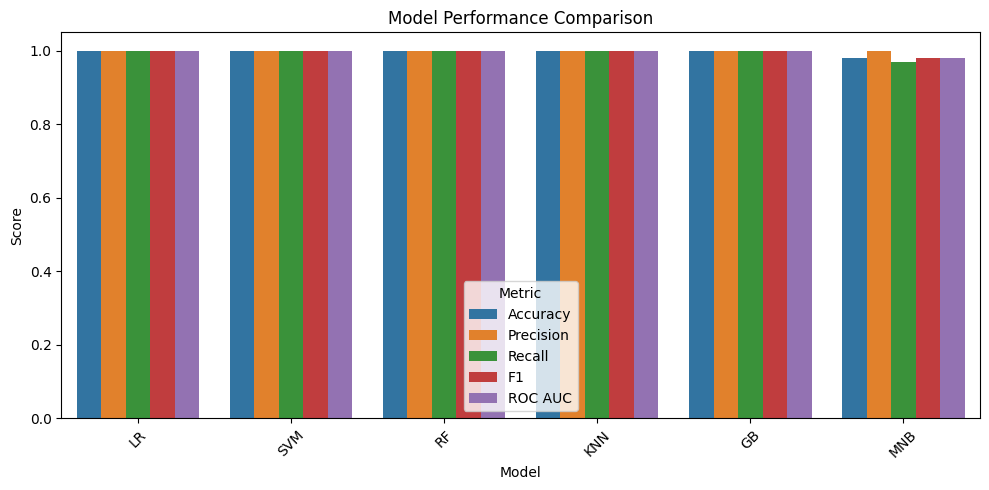

In [ ]:
# Performance Comparison Bar Chart
metrics = ['Accuracy', 'Precision', 'Recall', 'F1', 'ROC AUC']
comparison_data = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracies,
    'Precision': precisions,
    'Recall': recalls,
    'F1': f1_scores,
    'ROC AUC': roc_aucs
})

# Melt the dataframe for easier plotting
melted_data = pd.melt(comparison_data, id_vars=['Model'],
                      value_vars=['Accuracy', 'Precision', 'Recall', 'F1', 'ROC AUC'],
                      var_name='Metric', value_name='Score')

plt.figure(figsize=(10, 5))
sns.barplot(x='Model', y='Score', hue='Metric', data=melted_data)
plt.title('Model Performance Comparison')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('performance_comparison.png')
plt.show()

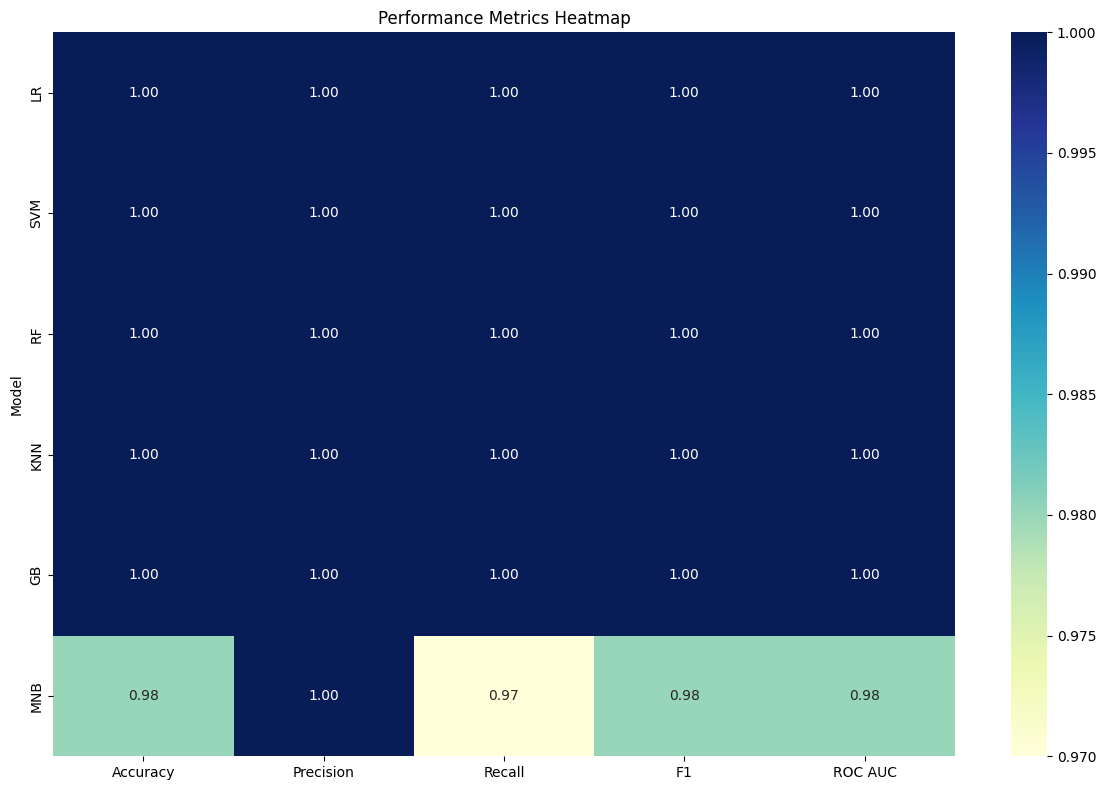

In [ ]:
plt.figure(figsize=(12, 8))
metrics_heatmap = comparison_data.set_index('Model')
sns.heatmap(metrics_heatmap, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Performance Metrics Heatmap')
plt.tight_layout()
plt.show()

In [ ]:
def confMetrics_plotting(conf_metric,model_name,ax):
  sns.heatmap(conf_metric, xticklabels=["Survived","Not Survived"],yticklabels=["Survived","Not Survived"],ax=ax)
  ax.set_xlabel('Predicted')
  ax.set_ylabel('Actual')
  ax.set_title(f'Confusion Matrix - {model_name}')

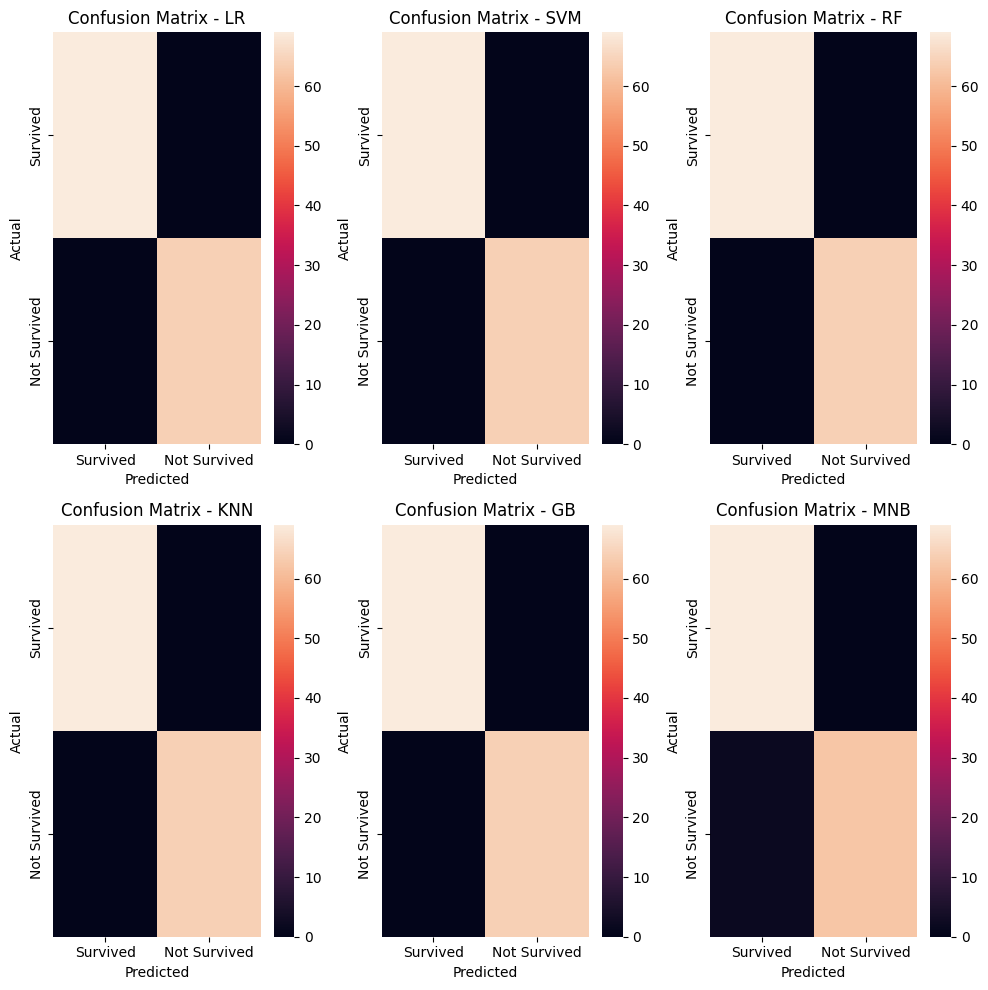

In [ ]:
plt.figure(figsize=(10,10))
for i,(n,c) in enumerate(zip(model_names,conf_matrices)):
  plt.subplot(2,3,i+1)
  confMetrics_plotting(c,n,plt.gca())
plt.tight_layout()
plt.show()

In [ ]:
best_model_index = np.argmax(accuracies)
best_model = model_names[best_model_index]
print(f"The best performing model is {best_model} with accuracy {accuracies[best_model_index]}")
print("\nDetailed metrics for the best model:")
print(f"Precision: {precisions[best_model_index]}")
print(f"Recall: {recalls[best_model_index]}")
print(f"F1 Score: {f1_scores[best_model_index]}")
print(f"ROC AUC: {roc_aucs[best_model_index]}")

The best performing model is LR with accuracy 1.0

Detailed metrics for the best model:
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
ROC AUC: 1.0


***There are several more factors that defines the performance of a model. In a case like this, where there are alot of models with similar results, the performane analysis is majorly affected by how complex, weighted and interpretable the model is although you wouldn't consider Logistic regression to be a great classifier, it certainly is best in this scenario bucause of its easy interpretability and less complexity even after being weighted least by the people.***